https://arxiv.org/abs/2305.14314 (original paper) <br/>
https://github.com/artidoro/qlora (qlora official github repo) <br/>
https://github.com/TimDettmers/bitsandbytes (bitsandbytes github 8-bit quantisation technique) <br/>
https://github.com/huggingface/peft (hugging face fine-tuning lib) <br/>

In [65]:
import torch
import sys
import matplotlib.pyplot as plt

In [8]:
# basic idea is quantise the original model weights with low bits than original bits for reducing 
# original weight memory, and use the lora technique to fine tune the down stream tasks without updating 
# the pre trained weights.

# why this is exciting idea?
# LLaMA 65B requires ~780GB GPU memory.🥵
# same model with qlora techniques can run on ~48GB single GPU memory.
# can be trained within 24 hrs time.

x data type:  torch.float32
x memory: 381 MB
y data type:  torch.int8
y memory: 95 MB


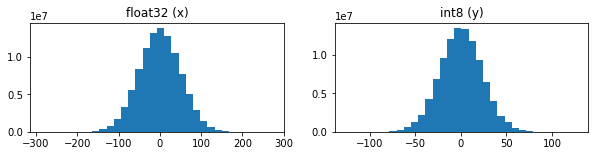

In [104]:
# naive 8bit int quantisation from float32 bit.
# element_size: returns bytes of each element in the tensor.
# numel: returns number of elements.
# memory is reduced drastically.
# at the same time distribution is sort of intact.

x = torch.randn(100000000) * 50
memory_of_x = round((x.element_size() * x.numel())/(1024**2))
print('x data type: ', x.dtype)
print(f"x memory: {memory_of_x} MB")
abs_max_x = x.max().abs()

y = (127 * (x/abs_max_x)).round().to(torch.int8)
memory_of_y = round((y.element_size() * y.numel())/(1024*1024))
print('y data type: ', y.dtype)
print(f"y memory: {memory_of_y} MB")


_, axs = plt.subplots(1, 2, figsize=(10, 2))
for title, ax, data in zip(('float32 (x)', 'int8 (y)'), axs, (x, y)):
    ax.hist(data.numpy(), bins=32)
    ax.set_title(title)
plt.show();

x data type:  torch.float32
x memory: 381 MB
y data type:  torch.int8
y memory: 95 MB


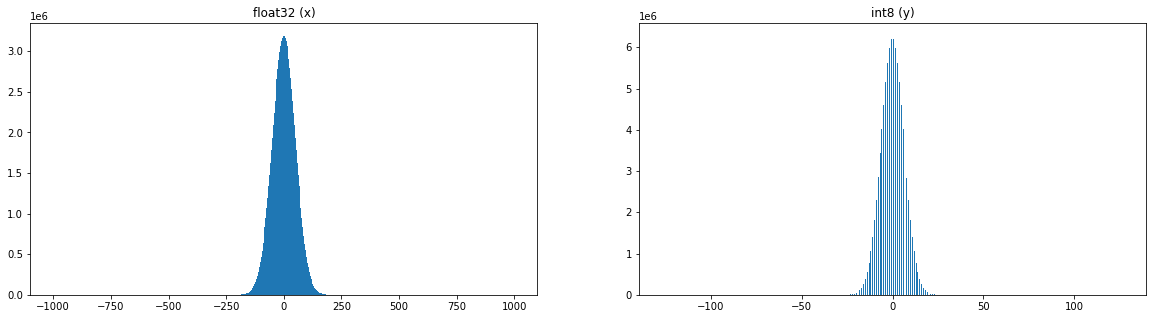

In [115]:
# failure case when there are outliers. then this technique dosn't properly preserve the distributions.
# white strip is the missing bins this happens due to this outlier and eneven property of the input data.

# big outlier issue: normal distribution (scaled with 5) is concated with extreme outlier value of 1000.
x = torch.cat([torch.randn(99999990) * 50, torch.tensor([1000.0, -1000.0])])

# narrow range issue: this is narrow range issue example.
# x = torch.randn(100000000) * 0.01

memory_of_x = round((x.element_size() * x.numel())/(1024**2))
print('x data type: ', x.dtype)
print(f"x memory: {memory_of_x} MB")
abs_max_x = x.max().abs()

y = (127 * (x/abs_max_x)).round().to(torch.int8)
memory_of_y = round((y.element_size() * y.numel())/(1024*1024))
print('y data type: ', y.dtype)
print(f"y memory: {memory_of_y} MB")


_, axs = plt.subplots(1, 2, figsize=(20, 5))
for title, ax, data in zip(('float32 (x)', 'int8 (y)'), axs, (x, y)):
    ax.hist(data.numpy(), bins=500)
    ax.set_title(title)
plt.show()